# Analise dos dados _Baseball Data_

Um estudo dos dados estatísticos do Major League Baseball de 1871 a 2014. 

In [1]:
#carregando as bibliotecas e configurações a serem utilizadas.
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
#import seaborn as sns
import numpy as np
import scipy.stats as stats
from IPython.display import display

plt.style.use('ggplot')
%matplotlib inline

### Jogadores de forma geral tem um bom custo/beneficio?

Hipotese: Dado que salário de jogadores normalmente tendem a refletir a fama dele por jogadas, sendo marcando pontos ou fazendo lances que necessitam de extremo dominio do esporte, nesta primeira analise farei uma regressão entre custo e desempenho de jogadores em relação as principais jogadas. Há uma tendecia entre os salários pagos e quantos jogadas/pontos os rebatedores marcam? O salário do jogador é justificado apenas pelo seu desempenho?
Serão mencionados os salario medio do periodo e os pontos marcados com home-runs (HR) no periodo. Serão analisador apenas dados deste milenio.

In [2]:
#organizando os dados
dfcusto = pd.read_csv('core/Salaries.csv')
dfbenef = pd.read_csv('core/Batting.csv')
#descartando colunas desnecessárias
dfcusto.drop(['teamID','lgID'], axis=1, inplace=True)
dfbenef = dfbenef[['playerID','yearID','HR','R','H','2B','3B','SB','G']]
#obtendo apenas dados após 1979
dfcusto = dfcusto[dfcusto['yearID']>1999]
dfbenef = dfbenef[dfbenef['yearID']>1999]
#descarta jogadores que não jogaram aquele ano para evitar erros
dfbenef = dfbenef[dfbenef['G']>0]
#printando
display(dfcusto.head(3))
display(dfbenef.head(3))

,yearID,playerID,salary
12263,2000,anderga01,3250000
12264,2000,belchti01,4600000
12265,2000,botteke01,4000000


,playerID,yearID,HR,R,H,2B,3B,SB,G
79248,abbotje01,2000,3.0,31.0,59.0,15.0,1.0,2.0,80
79249,abbotku01,2000,6.0,22.0,34.0,7.0,1.0,1.0,79
79250,abbotpa01,2000,0.0,1.0,2.0,1.0,0.0,0.0,35


Através de uma consulta rápida obtive que as jogadas favoritas dos fãs de baseball são essas : 'Homeruns(HR)','Runs(R)','Hits(H)','Doubles(2B)','Triples(3B)','Stolen Bases(SB)'
Assim separei-as para um dataframe as quais seriam avaliadas, após isso dividi em jogadas por jogo, para ter uma resposta da média de jogadas para o jogador.

In [4]:
df = {}
#cria colunas médias de jogadas por jogo
for x in ['HR','R','H','2B','3B','SB']:
    name = x + '/G'
    dfbenef[name] = dfbenef[x]/dfbenef['G']
    #obtendo a media salarial e de home-runs por jogo
    df[name] = dfbenef.groupby('playerID')[name].mean()

df['salary'] = dfcusto.groupby('playerID')['salary'].mean()
#descarta valores faltando
df = pd.DataFrame(data=df).dropna()
df.head(3)

,2B/G,3B/G,H/G,HR/G,R/G,SB/G,salary
aardsda01,0.0,0.0,0.000000,0.0,0.000000,0.0,1322821.0
abadan01,0.0,0.0,0.074074,0.0,0.037037,0.0,327000.0
abadfe01,0.0,0.0,0.004505,0.0,0.000000,0.0,629100.0


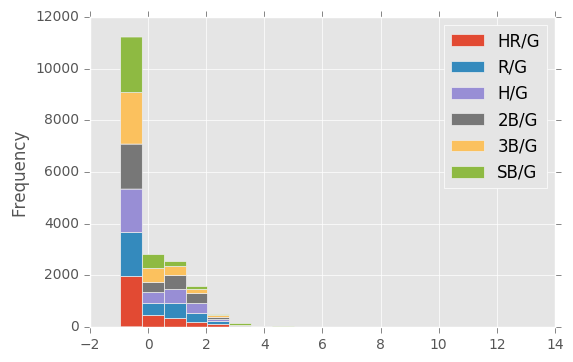

In [7]:
#analisando a distribuição
df[['HR/G','R/G','H/G','2B/G','3B/G','SB/G']].plot.hist(stacked=True, bins=20)

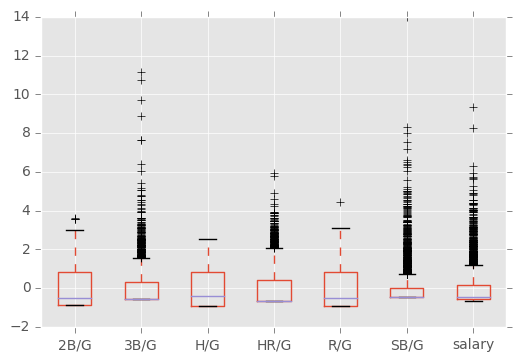

In [5]:
#normalizando os dados pelo desvio padrão
for x in df.keys():
    df[x] = (df[x] - df[x].mean()) / df[x].std()

df.boxplot()

Podemos ver que as jogadas Stolen Bases, Triples e Homeruns tem a maior variação entre os jogadores, assim focaremos nestas três jogadas para analisar a varição salarial

In [ ]:
f, ((ax1, ax2, ax3)) = plt.subplots(3, sharex='col', sharey='row')
ax = [ax1,ax2,ax3]
y = df['salary']
for i,k in enumerate(['SB/G','3B/G','HR/G']):
    x = df[k]
    ax[i].scatter(x,y,marker='x')
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    xl = np.linspace(x.min(),x.max(),2)
    yl = xl * slope + intercept
    ax[i].plot(xl,yl)
    display("{} = r_value: {:.4}, p_value: {:.4}, std_err: {:.4}".format(k,r_value, p_value, std_err))

Conclusão: Através da analise do gráfico acima podemos ver que sendo x o numero de jogadas e analisando cada r_value separadamente, vemos que a jogada que melhor explica o salário são os Homeruns marcados, porém não é tudo, existem outras variaveis que causam um maior salário para o jogador.